In [1]:
import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.cuda.is_available())

2.0.1+cu117
11.7
True


In [ ]:
import torch
from torchviz import make_dot
import torch.nn as nn
import pandas as pd
import numpy as np
from search_space import SimpleCIFAR10ModelSpace, TutorialModelSpace
import sequence_preprocess
from cifar10net import df_to_fcgr
from nni.nas.evaluator import FunctionalEvaluator
import nni.nas.strategy as strategy
from nni.nas.experiment import NasExperiment
from nni.nas.experiment.config import NasExperimentConfig
from evaluator import *

In [2]:
batch_size=64
num_worker = 4
k=7

## Basemodel 

In [3]:
class CIFAR10Net(nn.Module):
    def __init__(self, num_classes):
        super(CIFAR10Net, self).__init__()
        kernel_size = 3
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=kernel_size, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=kernel_size, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=kernel_size, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [4]:
# df = sequence_preprocess.load_genome_data()
# df

In [5]:
# df_fcgr = df_to_fcgr(df, k)
# df_fcgr

In [6]:
# most_common_class_count = df['label'].value_counts().max()
# total_samples = len(df)
# baseline_accuracy = most_common_class_count / total_samples
# print(f"Baseline Accuracy: {baseline_accuracy * 100:.4f}%")

In [7]:
model_space = TutorialModelSpace()
search_strategy = strategy.RegularizedEvolution(population_size=10, sample_size=3)
evaluator = FunctionalEvaluator(hw_evaluation_model, **{"filepath":"genome_dataset.csv", "group" : "genome_id", "batch_size" : 256, "epochs" : 30, "num_workers" : 8})
config = NasExperimentConfig("sequential", "simplified", "local", **{"debug":True})
exp = NasExperiment(model_space, evaluator, search_strategy, config)
exp.config.max_trial_number = 25   # spawn 3 trials at most
exp.config.trial_concurrency = 1  # will run 1 trial concurrently
exp.config.trial_gpu_number = 0   # will not use GPU
exp.config.execution_engine.name = "sequential"
exp.run(port=8081, debug = True)

[2025-06-07 14:25:05] WARNING: `training_service` will be ignored for sequential execution engine.
[2025-06-07 14:25:05] WARNING: `training_service` will be ignored for sequential execution engine.
[2025-06-07 14:25:05] WARNING: `training_service` will be ignored for sequential execution engine.
[2025-06-07 14:25:05] WARNING: `training_service` will be ignored for sequential execution engine.
[2025-06-07 14:25:05] WARNING: `training_service` will be ignored for sequential execution engine.
[2025-06-07 14:25:05] WARNING: `training_service` will be ignored for sequential execution engine.
[2025-06-07 14:25:05] WARNING: `training_service` will be ignored for sequential execution engine.
[2025-06-07 14:25:05] WARNING: `training_service` will be ignored for sequential execution engine.
[2025-06-07 14:25:05] WARNING: `training_service` will be ignored for sequential execution engine.
[2025-06-07 14:25:05] WARNING: `training_service` will be ignored for sequential execution engine.
[2025-06-0

Training: 100%|██████████| 77/77 [00:08<00:00,  9.45it/s]



Test set: Accuracy: 0/8412 (0%)

Reset Patience
Epoch 1


Training: 100%|██████████| 77/77 [00:07<00:00,  9.88it/s]



Test set: Accuracy: 0/8412 (0%)

Epoch 2


Training: 100%|██████████| 77/77 [00:07<00:00,  9.86it/s]



Test set: Accuracy: 0/8412 (0%)

Epoch 3


Training: 100%|██████████| 77/77 [00:07<00:00,  9.94it/s]



Test set: Accuracy: 0/8412 (0%)

Epoch 4


Training: 100%|██████████| 77/77 [00:07<00:00,  9.91it/s]



Test set: Accuracy: 0/8412 (0%)

Epoch 5


Training: 100%|██████████| 77/77 [00:07<00:00,  9.83it/s]



Test set: Accuracy: 0/8412 (0%)

Epoch 6


Training: 100%|██████████| 77/77 [00:07<00:00,  9.86it/s]



Test set: Accuracy: 0/8412 (0%)

Epoch 7


Training: 100%|██████████| 77/77 [00:07<00:00,  9.85it/s]



Test set: Accuracy: 0/8412 (0%)

Epoch 8


Training: 100%|██████████| 77/77 [00:07<00:00,  9.80it/s]



Test set: Accuracy: 0/8412 (0%)

Epoch 9


Training: 100%|██████████| 77/77 [00:07<00:00,  9.94it/s]



Test set: Accuracy: 36/8412 (0%)

Early stopping triggered


/home/luis/bin/miniconda3/envs/hwnascim/lib/python3.10/site-packages/torch/fx/_symbolic_trace.py:913: UserWarning: Was not able to add assertion to guarantee correct input x to specialized function. It is up to the user to make sure that your inputs match the inputs you specialized the function with.
  warnings.warn(


no match for _tensor_constant0 _tensor_constant0
no match for conv1 conv1 in call_modules
no match for conv2_depthwise conv2.depthwise in call_modules
no match for conv2_pointwise conv2.pointwise in call_modules
no match for max_pool2d <function boolean_dispatch.<locals>.fn at 0x7b4a1e1580d0> in call_function
no match for pool pool in call_modules
no match for dropout1 dropout1 in call_modules
no match for fc1 fc1 in call_modules
no match for dropout2 dropout2 in call_modules
no match for fc2 fc2 in call_modules
no match for log_softmax <function log_softmax at 0x7b4a1e159c60> in call_function
run on device cuda
load state_dict
Due to quantization MNSIM-2.0 does not support bias in convolution layer. Please use conv2d + batchnorm insead.
Due to quantization MNSIM-2.0 does not support bias in convolution layer. Please use conv2d + batchnorm insead.
Due to quantization MNSIM-2.0 does not support bias in convolution layer. Please use conv2d + batchnorm insead.
Due to quantization MNSIM-2.

UnboundLocalError: local variable 'tmp_buffer' referenced before assignment

In [ ]:
best_models  = exp.export_top_models(formatter='instance')

True


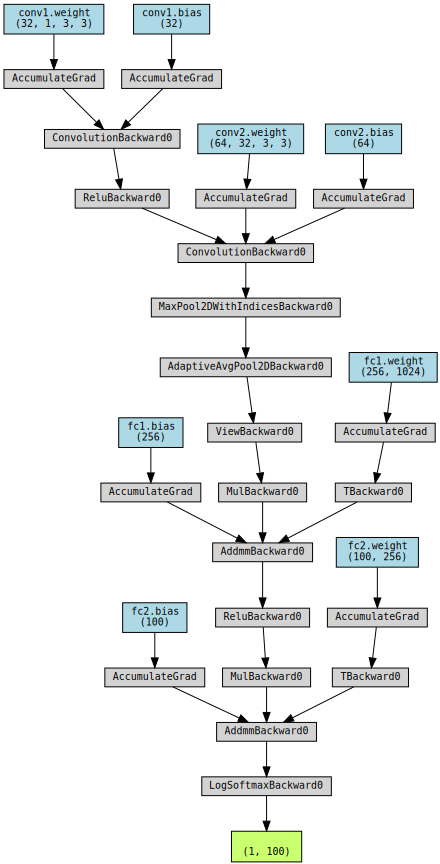

In [ ]:
model = best_models[0]
x = torch.randn(1, 1, 28, 28)  # Adjust shape to your input
print(isinstance(model, torch.nn.Module))
y = model(x)

dot = make_dot(y, params=dict(model.named_parameters()))
dot